#Predicting Heart Disease using Machine Learning Methods - Part II. - Classification Project

The following code of this notebook uses various Python-based machine learning and data science libraries to build a classification model in order to predict if a patient has heart disease or not, based on their medical data (various features).

The framework of this project is as follows:
  1. Defining the problem
  2. Looking at the data
  3. Evaluation
  4. Feature selection
  5. Modelling the data
  6. Experimenting to better the model
  7. SWOT Analysis

##  5. Modelling the Data

Before fitting a model to the data it is crucial that there are no missing values and that all the feature values are in numerical format.

###Handling Missing Values


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")

In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
df.shape

(920, 15)

In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

The dataset has missing values in the following columns: 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'. When it comes to the target feature 'num', there are no missing values, so I won't delete any of the patients records. Since the 'age' and 'sex' columns have no missing values, I will use them to group the data and impute based on the values in those groups. I will impute the values the following way:
* I will impute the  numerical features using the median value. (* I will use the median since it is less sensitive to extreme values than the mean.)
* I will impute the categoical features using the most frequent value (mode).


In [ ]:
#Creating an age_group column (grouping by 10 years starting from 10, ending at 100)

df['age_group'] = pd.cut(df['age'], bins=range(10, 100, 10), right=False)

Imputing the Numerical Features

In [ ]:
#Median for all age groups

df.pivot_table(index='age_group', values=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], aggfunc='median')

,ca,chol,oldpeak,thalch,trestbps
age_group,,,,,
"[20, 30)",0.0,204.0,0.0,177.5,130.0
"[30, 40)",0.0,214.0,0.0,156.0,120.0
"[40, 50)",0.0,234.0,0.0,147.0,125.0
"[50, 60)",0.0,222.5,0.6,137.0,130.0
"[60, 70)",1.0,221.5,1.0,131.0,138.0
"[70, 80)",1.0,216.0,1.5,120.0,140.0


The maximum heart rate seems to slow down by age, whilst the resting blood pressure increases by age.

In [ ]:
#Median for both genders
df.pivot_table(index='sex', values=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], aggfunc='median')

,ca,chol,oldpeak,thalch,trestbps
sex,,,,,
Female,0.0,244.0,0.0,150.0,130.0
Male,0.0,220.0,0.6,135.0,130.0


Women seem to have larger cholesterol levels and higher maximum heart rate than male patients.

In [ ]:
#Median for both genders and all age groups

df.pivot_table(index=['sex', 'age_group'], values=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], aggfunc='median')

ca   chol  oldpeak  thalch  trestbps
sex    age_group                                       
Female [30, 40)   0.0  199.0     0.00   166.0     120.0
       [40, 50)   0.0  234.0     0.00   153.0     124.5
       [50, 60)   0.0  267.0     0.45   144.0     130.0
       [60, 70)   0.5  260.5     1.00   148.0     140.0
       [70, 80)   1.0  231.0     0.30   123.0     130.0
Male   [20, 30)   0.0  204.0     0.00   177.5     130.0
       [30, 40)   0.0  221.5     0.00   154.5     120.0
       [40, 50)   0.0  233.5     0.00   144.5     126.5
       [50, 60)   0.0  217.0     0.80   132.0     130.0
       [60, 70)   1.0  212.0     1.40   128.0     135.0
       [70, 80)   1.5  216.0     1.60   114.0     145.0

In [ ]:
#Creating a dummy DataFrame to compare before vs. after imputing

df_dummy = df

In [ ]:
#Creating an imputer function for the numerical features
from sklearn.impute import SimpleImputer

def impute_numerical_features(df, pivot_table):
    numerical_columns = pivot_table.columns
    for column in numerical_columns:
        for index, median_value in pivot_table[column].items():
            condition = (df['sex'] == index[0]) & (df['age_group'] == index[1])
            df.loc[condition, column] = df.loc[condition, column].fillna(median_value)
    return df

In [ ]:
#Imputing the dataset with the median values of the pivot

pivot_table_num = df.pivot_table(index=['sex', 'age_group'], values=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], aggfunc='median')
df_imputed_numerical = impute_numerical_features(df.copy(), pivot_table_num)

In [ ]:
df_imputed_numerical.isnull().sum()

age            0
sex            0
dataset        0
cp             0
trestbps       0
chol           0
fbs           90
restecg        2
thalch         0
exang         55
oldpeak        0
slope        309
ca             0
thal         486
num            0
age_group      0
dtype: int64

In [ ]:
df_dummy.loc[[918]]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,"[50, 60)"


In [ ]:
df_imputed_numerical.loc[[918]]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,132.0,NaN,0.8,NaN,0.0,NaN,0,"[50, 60)"


The imputing was successful, now I will handle the missing categorical values.

Imputing the Categorical Features

In [ ]:
#Most frequent value for both genders and all age groups

df.pivot_table(index=['sex', 'age_group'], values=['fbs', 'restecg', 'exang', 'slope', 'thal'], aggfunc=lambda x: x.value_counts().idxmax())

exang    fbs         restecg      slope               thal
sex    age_group                                                            
Female [30, 40)   False  False          normal  upsloping             normal
       [40, 50)   False  False          normal       flat             normal
       [50, 60)   False  False          normal       flat             normal
       [60, 70)   False  False          normal       flat             normal
       [70, 80)   False  False          normal  upsloping             normal
Male   [20, 30)   False  False  lv hypertrophy  upsloping             normal
       [30, 40)   False  False          normal       flat             normal
       [40, 50)   False  False          normal       flat             normal
       [50, 60)   False  False          normal       flat  reversable defect
       [60, 70)    True  False          normal       flat  reversable defect
       [70, 80)    True  False          normal       flat  reversable defect

In [ ]:
#Creating an imputer function for the categorical features

def impute_categorical_features(df, pivot_table):
    categorical_columns = pivot_table.columns
    for column in categorical_columns:
        for index, frequent_value in pivot_table[column].items():
            condition = (df['sex'] == index[0]) & (df['age_group'] == index[1])
            df.loc[condition, column] = df.loc[condition, column].fillna(frequent_value)
    return df

In [ ]:
#Imputing the dataset with the most frequent values of the pivot

pivot_table_cat = df.pivot_table(index=['sex', 'age_group'], values=['fbs', 'restecg', 'exang', 'slope', 'thal'], aggfunc=lambda x: x.value_counts().idxmax())
df_imputed_categorical = impute_categorical_features(df.copy(), pivot_table_cat)

In [ ]:
df_imputed_categorical.isnull().sum()

age            0
sex            0
dataset        0
cp             0
trestbps      59
chol          30
fbs            0
restecg        0
thalch        55
exang          0
oldpeak       62
slope          0
ca           611
thal           0
num            0
age_group      0
dtype: int64

In [ ]:
df_dummy.loc[[918]]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,"[50, 60)"


In [ ]:
df_imputed_categorical.loc[[918]]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,False,NaN,flat,NaN,reversable defect,0,"[50, 60)"


The imputing is correct again, now I will create a new, imputed DataFrame (df_imp).

In [ ]:
df_imp = impute_numerical_features(df.copy(), pivot_table_num)

In [ ]:
df_imp = impute_categorical_features(df_imp, pivot_table_cat)

In [ ]:
df_imp.isnull().sum()

age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
age_group    0
dtype: int64

In [ ]:
df_imp.to_csv("df_imp.csv", index=False)

Imputation Validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df_imp = pd.read_csv("df_imp.csv")

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")
#sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()
selected_color = palette[6]
accent_color = palette[4]

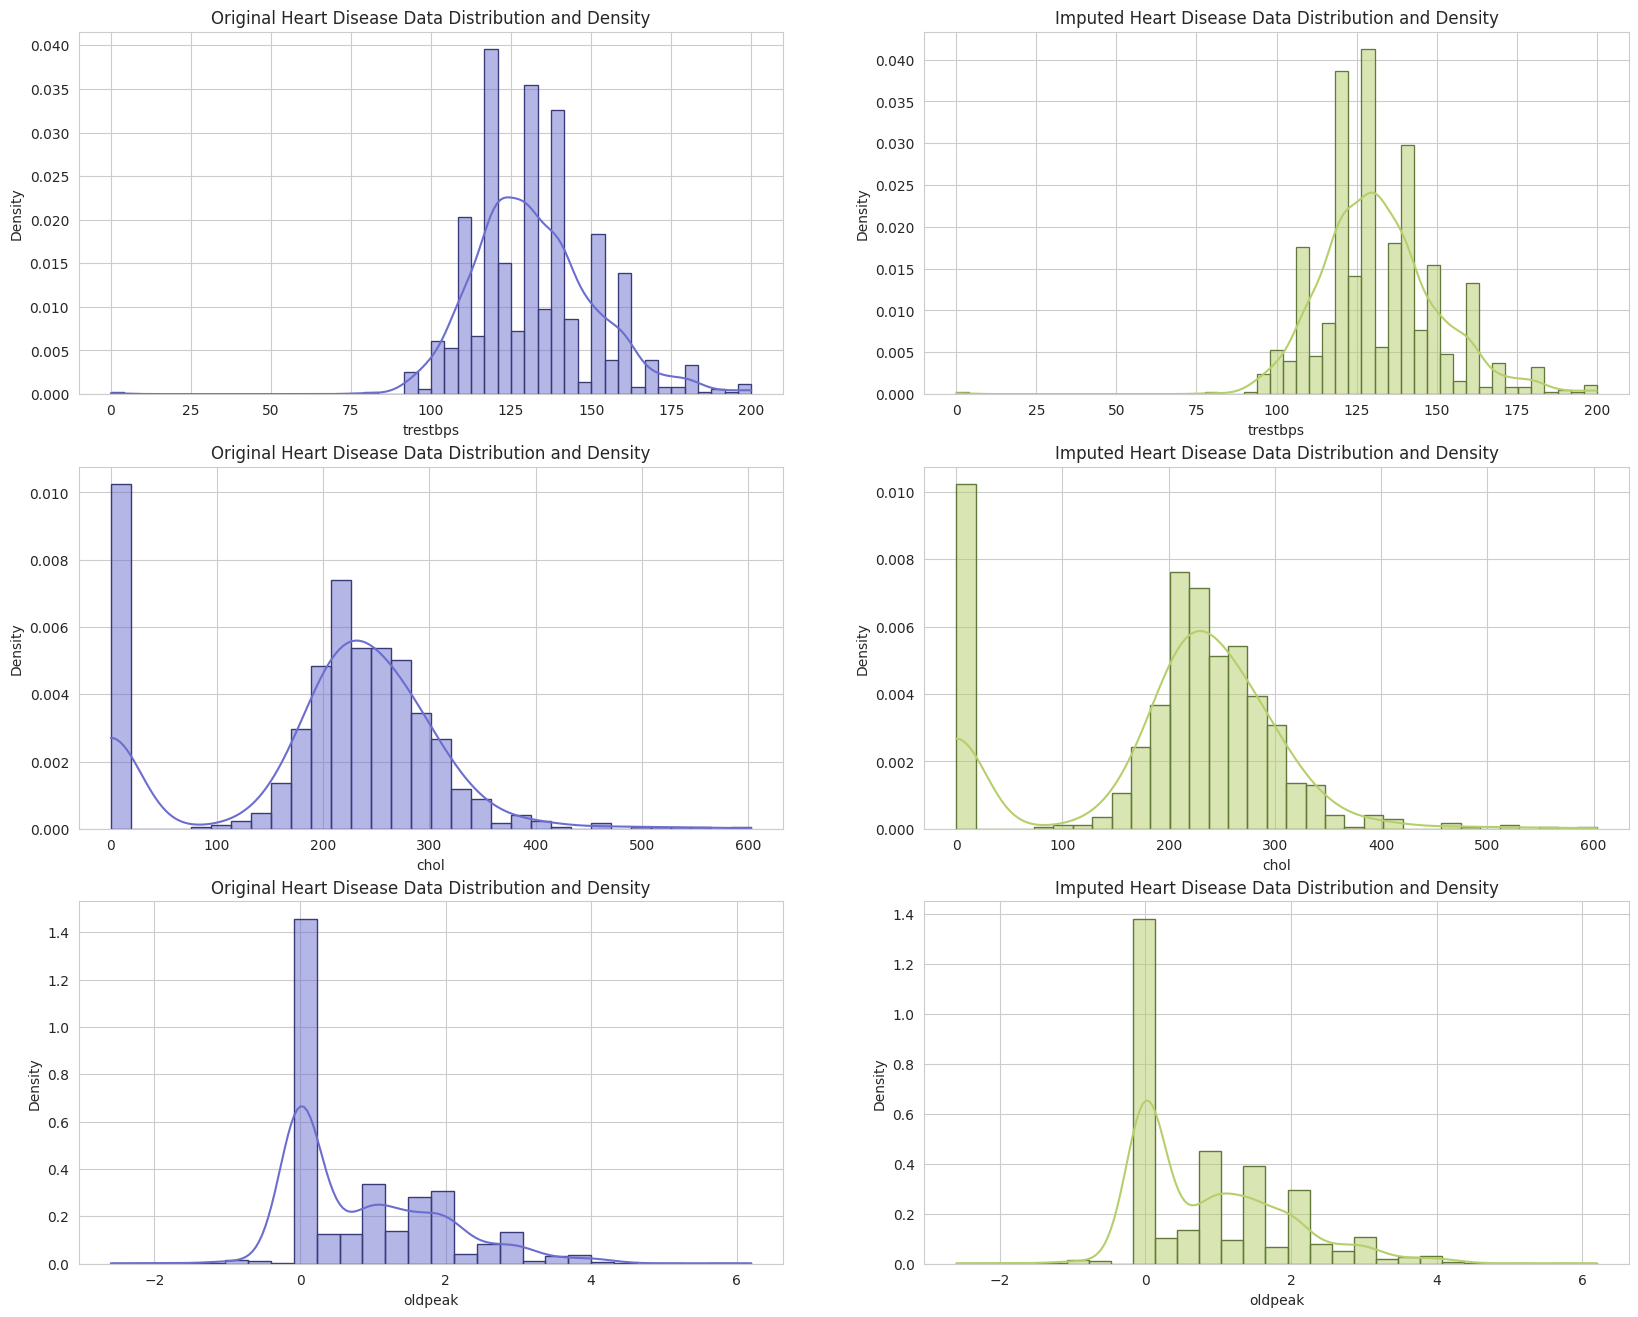

In [ ]:
numeric_columns = ["trestbps", "chol", "oldpeak"]

fig, axes = plt.subplots(3, 2, figsize=(20, 16))

for id, feature in enumerate(numeric_columns):
    sns.histplot(data=df[feature], stat='density', ax=axes[id, 0], kde=True, color=palette[2], edgecolor=palette[0])
    axes[id, 0].set_title('Original Heart Disease Data Distribution and Density')
    axes[id, 0].set_xlabel(feature)
    axes[id, 0].set_ylabel('Density')

    sns.histplot(data=df_imp[feature], stat='density', ax=axes[id, 1], kde=True, color=selected_color, edgecolor=accent_color)
    axes[id, 1].set_title('Imputed Heart Disease Data Distribution and Density')
    axes[id, 1].set_xlabel(feature)
    axes[id, 1].set_ylabel('Density')

plt.savefig("num_imputed_validate.jpg")

After imputing the numerical features the new, imputed data is still a good representation of the original dataset.

In [ ]:
palette = sns.color_palette()
selected_color = palette[19]
accent_color = palette[16]

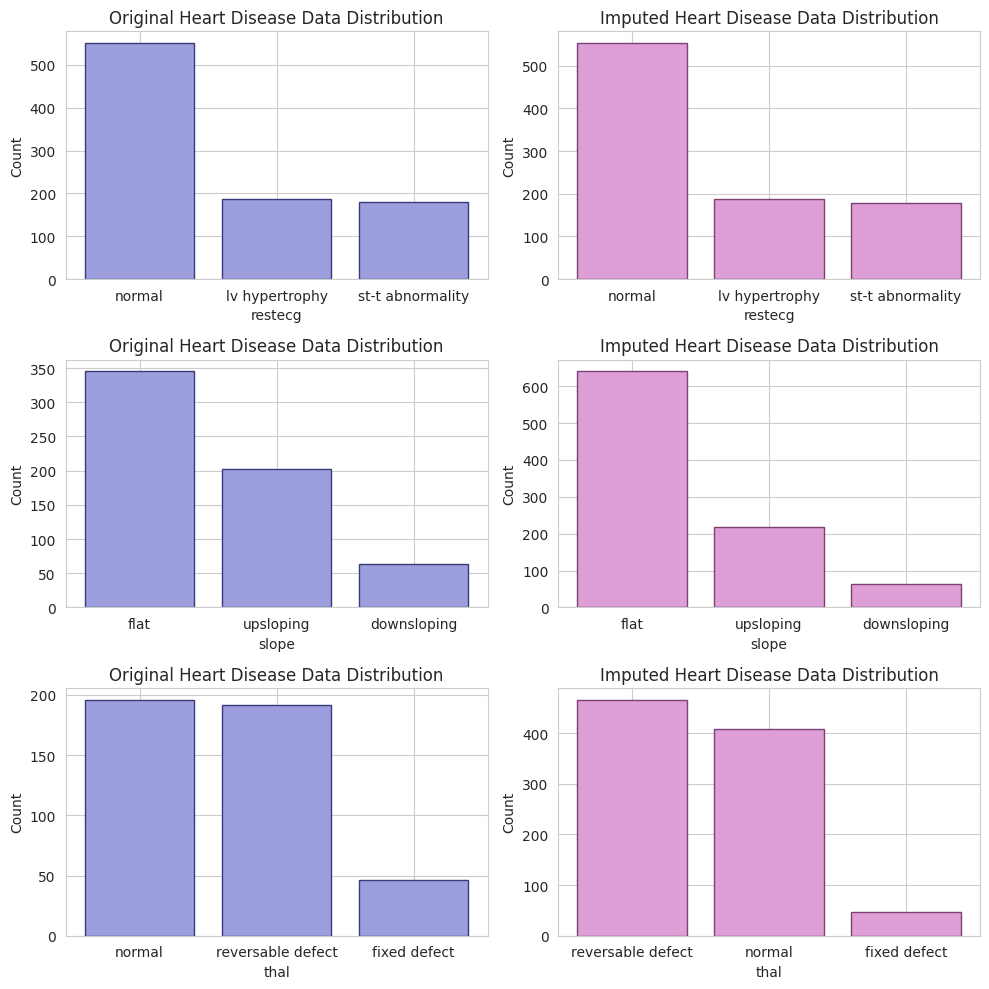

In [ ]:
categorical_columns = ["restecg", "slope", "thal"]

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for id, feature in enumerate(categorical_columns):
    # Original Heart Disease Data Distribution
    axes[id, 0].bar(df[feature].value_counts().index, df[feature].value_counts(), color=palette[3], edgecolor=palette[0])
    axes[id, 0].set_title('Original Heart Disease Data Distribution')
    axes[id, 0].set_xlabel(feature)
    axes[id, 0].set_ylabel('Count')

    # Imputed Heart Disease Data Distribution
    axes[id, 1].bar(df_imp[feature].value_counts().index, df_imp[feature].value_counts(), color=selected_color, edgecolor=accent_color)
    axes[id, 1].set_title('Imputed Heart Disease Data Distribution')
    axes[id, 1].set_xlabel(feature)
    axes[id, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig("cat_imputed_validate_matplotlib.jpg")

When it comes to the categorical features the new, imputed data is still a good representation of the original dataset, except for the thalium stress results, in which case I managed to introduce a few more reversable defect cases (nothing too extreme).

After successfully imputing all missing values, I will transform the non-numerical values to numerical using One-Hot Encoding.

###One-Hot Encoding Non-Numerical Values


In [ ]:
#The categorical features are the following:

df_imp.select_dtypes(include='object').columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

I will drop the age_group columns since I no longer need it.

In [ ]:
df_imp.drop("age_group", axis=1, inplace=True)

In [ ]:
#One-Hot encoding using get_dummies()

categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_enc = pd.get_dummies(df_imp, columns=categorical_features)
df_enc

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,3.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,0.0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
916,62,135.0,139.0,128.0,1.4,1.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
917,55,122.0,223.0,100.0,0.0,0.0,2,0,1,0,...,0,1,1,0,0,1,0,1,0,0
918,58,130.0,385.0,132.0,0.8,0.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_enc.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [ ]:
#Renaming a few column names to get rid of spacing

df_enc.rename(columns={"dataset_VA Long Beach": "dataset_VA_Long_Beach"})
df_enc.rename(columns={"cp_atypical angina": "cp_atypical_angina"})
df_enc.rename(columns={"cp_typical angina": "cp_typical_angina"})
df_enc.rename(columns={"restecg_lv hypertrophy": "restecg_lv_hypertrophy"})
df_enc.rename(columns={"restecg_st-t abnormality": "restecg_st-t_abnormality"})
df_enc.rename(columns={"thal_fixed defect": "thal_fixed_defect"})
df_enc.rename(columns={"thal_reversable defect": "thal_reversable_defect"})

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable_defect
0,63,145.0,233.0,150.0,2.3,0.0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,3.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,0.0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
916,62,135.0,139.0,128.0,1.4,1.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
917,55,122.0,223.0,100.0,0.0,0.0,2,0,1,0,...,0,1,1,0,0,1,0,1,0,0
918,58,130.0,385.0,132.0,0.8,0.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_enc.dtypes

age                           int64
trestbps                    float64
chol                        float64
thalch                      float64
oldpeak                     float64
ca                          float64
num                           int64
sex_Female                    uint8
sex_Male                      uint8
dataset_Cleveland             uint8
dataset_Hungary               uint8
dataset_Switzerland           uint8
dataset_VA Long Beach         uint8
cp_asymptomatic               uint8
cp_atypical angina            uint8
cp_non-anginal                uint8
cp_typical angina             uint8
fbs_False                     uint8
fbs_True                      uint8
restecg_lv hypertrophy        uint8
restecg_normal                uint8
restecg_st-t abnormality      uint8
exang_False                   uint8
exang_True                    uint8
slope_downsloping             uint8
slope_flat                    uint8
slope_upsloping               uint8
thal_fixed defect           

In [ ]:
df_enc.to_csv("df_enc.csv", index=False)

##Constructing a Heart Disease Classifier
* Model construction steps:
  1. Splitting the data into train and test splits
  2. Choosing models for predicting
  3. Fitting the models
  4. Evaluating the prediction accuracies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df_enc = pd.read_csv("df_enc.csv")

In [ ]:
df_enc.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,3.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
#Splitting the data into X (input features) and y (target feature)

X = df_enc.drop("num", axis=1)
y = df_enc["num"]

X.shape, y.shape

((920, 29), (920,))

1. Splitting the data into train and test splits

In [ ]:
#Splitting the data into train and test splits

from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((736, 29), (184, 29), (736,), (184,))

2. Choosing models for predicting
* I will try out multiple classification models in order to find the one with the highest accuracy. The models I will test are the following:
  - LogisticRegression
  - KNeighborsClassifier (KNN)
  - RandomForestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating a dictionary for the models I will be trying

models = { "LogisticRegression": LogisticRegression(max_iter=1000),
"KNeighborsClassifier": KNeighborsClassifier(),
"RandomForestClassifier": RandomForestClassifier(),
}

 3. Fitting the models &  4. Evaluating the prediction accuracies

In [ ]:
#Creating a function for fitting and scoring the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {} #Making a model_scores dictionary to store accuracies
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.5597826086956522,
 'KNeighborsClassifier': 0.46195652173913043,
 'RandomForestClassifier': 0.5652173913043478}

I got a ConvergenceWarning (related to the LogisticRegression model), to adress this warning and improve the model's score I will be scaling the data (X). Scaling features helps with the accuracy of the model as it ensures that all features contribute equally and there are no extreme values.



###Scaling the data (X)
I will compare two different scalers to see which one improves the model accuracy more:
* Scaling using StandardScaler
* Scaling using MinMaxScaler

1) StandardScaler

In [ ]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
scaler_s = StandardScaler()
X_train_s = scaler_s.fit_transform(X_train)
X_test_s = scaler_s.transform(X_test)

In [ ]:
X_train_s

array([[ 0.90241255,  0.17326849, -0.26308956, ..., -0.23007121,
        -0.88924364,  0.98382643],
       [ 0.03477619,  0.97548455,  0.16795191, ..., -0.23007121,
        -0.88924364,  0.98382643],
       [-0.29058745, -0.09413686,  1.2868255 , ..., -0.23007121,
        -0.88924364,  0.98382643],
       ...,
       [ 2.31232163,  1.51029525,  1.02086374, ..., -0.23007121,
        -0.88924364,  0.98382643],
       [-0.07367836,  0.44067385,  0.15878081, ..., -0.23007121,
         1.12455119, -1.01643946],
       [ 0.36013982, -0.201099  ,  0.95666608, ..., -0.23007121,
         1.12455119, -1.01643946]])

In [ ]:
#Fitting and scoring using the scaled data (StandardScaler)

np.random.seed(42)
model_scores_s = fit_and_score(models, X_train_s, X_test_s, y_train, y_test)
model_scores_s

{'LogisticRegression': 0.5760869565217391,
 'KNeighborsClassifier': 0.5489130434782609,
 'RandomForestClassifier': 0.5652173913043478}

In [ ]:
model_scores

{'LogisticRegression': 0.5597826086956522,
 'KNeighborsClassifier': 0.46195652173913043,
 'RandomForestClassifier': 0.5652173913043478}

After scaling the data there is a slight improvement in the accuracy of both the LogisticRegression and KNN model's accuracies.

2) MinMaxScaler

In [ ]:
#Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
scaler_m = MinMaxScaler()
X_train_m = scaler_m.fit_transform(X_train)
X_test_m = scaler_m.transform(X_test)

In [ ]:
X_train_m

array([[0.69387755, 0.675     , 0.28192371, ..., 0.        , 0.        ,
        1.        ],
       [0.53061224, 0.75      , 0.35986733, ..., 0.        , 0.        ,
        1.        ],
       [0.46938776, 0.65      , 0.56218905, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.95918367, 0.8       , 0.51409619, ..., 0.        , 0.        ,
        1.        ],
       [0.51020408, 0.7       , 0.35820896, ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.64      , 0.50248756, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#Fitting and scoring using the scaled data (MinMaxScaler)

np.random.seed(42)
model_scores_m = fit_and_score(models, X_train_m, X_test_m, y_train, y_test)
model_scores_m

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

In [ ]:
model_scores

{'LogisticRegression': 0.5597826086956522,
 'KNeighborsClassifier': 0.46195652173913043,
 'RandomForestClassifier': 0.5652173913043478}

The accuracies improved yet again for both the LogisticRegression and KNN models.

Comparing Scalers
1. StandardScaler Results

In [ ]:
scaler_s_acc = pd.DataFrame(model_scores_s, index=["accuracy"])
scaler_s_acc

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
accuracy,0.576087,0.548913,0.565217


2. MinMaxScaler Results

In [ ]:
scaler_m_acc = pd.DataFrame(model_scores_m, index=["accuracy"])
scaler_m_acc

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
accuracy,0.597826,0.570652,0.565217


We can see that the data scaled using MinMaxScaler did better for each of the three baseline models. From now on I will be using the data scaled with MinMaxScaler. I will create two new DataFrames that contain the scaled train and test data (X_train and X_test) and keep the names of the columns the same.

In [ ]:
#Creating new X_train and X_test dataframes scaled using the MinMaxScaler instance scaler_m

column_names = X_train.columns #The column names are the same for X_train and X_test

np.random.seed(42)

X_train = pd.DataFrame(X_train_m, columns=column_names)

X_test = pd.DataFrame(X_test_m, columns=column_names)

In [ ]:
X_train.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.693878,0.675,0.281924,0.422535,0.636364,0.333333,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.530612,0.750,0.359867,0.436620,0.295455,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.469388,0.650,0.562189,0.507042,0.386364,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.448980,0.600,0.363184,0.690141,0.477273,0.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.489796,0.600,0.538972,0.788732,0.318182,0.000000,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train.shape

(736, 29)

In [ ]:
X_test.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.163265,0.60,0.275290,0.845070,0.295455,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.346939,0.70,0.371476,0.436620,0.295455,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.408163,0.80,0.545605,0.225352,0.465909,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.632653,0.82,0.291874,0.211268,0.409091,0.666667,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.244898,0.75,0.650083,0.492958,0.522727,0.000000,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_test.shape

(184, 29)

###Comparing Classifier Accuracies
* Fitting and evaluating the models on the improved (scaled) data and comparing for highest prediction accuracy.

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
accuracy,0.597826,0.570652,0.565217


In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

selected_color = palette[6]
accent_color = palette[7]

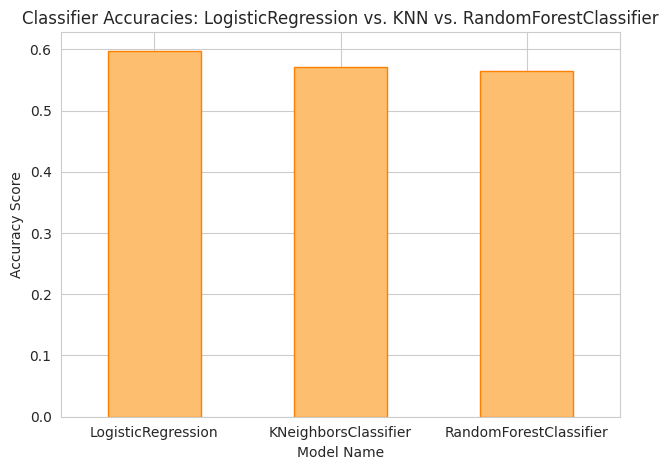

In [ ]:
#Plotting the accuracy scores

fig, ax = plt.subplots()
model_compare.T.plot.bar(ax=ax, color=selected_color, edgecolor=accent_color)


ax.set_title("Classifier Accuracies: LogisticRegression vs. KNN vs. RandomForestClassifier")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=0)

ax.legend().set_visible(False)

plt.tight_layout()
fig.savefig("model_compare.jpg")

Out of the three baseline models the best performing is the LogisticRegression model.

##6. Experimenting to Better the Models
The first models are usually not the best at predicting, so I will try to improve them by looking at the following:
* Hypyterparameter tuning - with cross-validation
* Classifier evaluation - with cross-validation:
  - Confusion matrix
  - Classification report
  - Precision, Recall and F1 score
  - ROC curve and AUC metrics (area under the curve)
* Feature importance



1) Hyperparameter tuning

* Tuning KNN

In [ ]:
#Tuning KNN by hand and trying out different values for n_neighbors

train_scores = []
test_scores = []

#Creating a list of values for n_neighbors (default being 5)
neighbors = range(1, 31)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
#train_scores

In [ ]:
test_scores

[0.5706521739130435,
 0.5434782608695652,
 0.5597826086956522,
 0.5652173913043478,
 0.5706521739130435,
 0.5652173913043478,
 0.5597826086956522,
 0.5434782608695652,
 0.5597826086956522,
 0.5489130434782609,
 0.5543478260869565,
 0.5543478260869565,
 0.5434782608695652,
 0.5543478260869565,
 0.5434782608695652,
 0.5380434782608695,
 0.5597826086956522,
 0.5652173913043478,
 0.5706521739130435,
 0.5815217391304348,
 0.5760869565217391,
 0.5597826086956522,
 0.5652173913043478,
 0.5652173913043478,
 0.5434782608695652,
 0.5543478260869565,
 0.532608695652174,
 0.5380434782608695,
 0.5489130434782609,
 0.5597826086956522]

Comparing KNN n_neighbors values

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

train_color = palette[3]
test_color = palette[7]

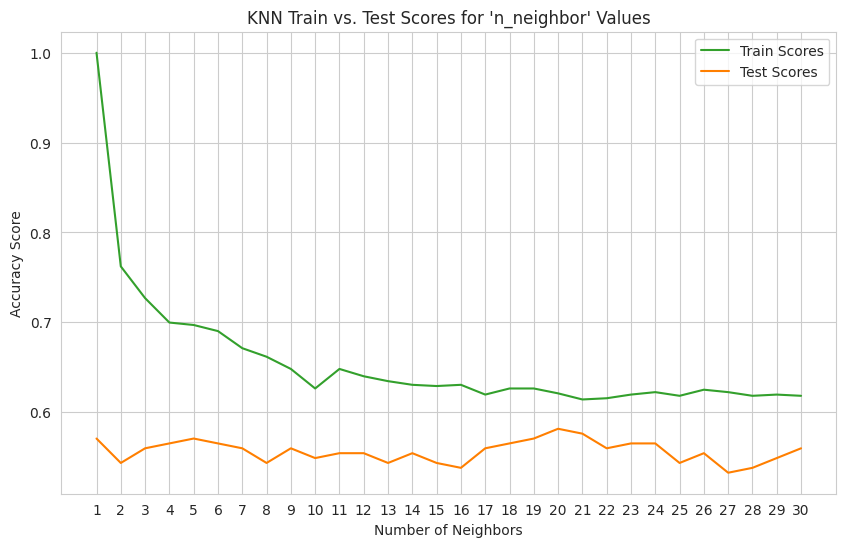

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train Scores", color=train_color)
plt.plot(neighbors, test_scores, label="Test Scores", color=test_color)

plt.title("KNN Train vs. Test Scores for 'n_neighbor' Values")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")

plt.xticks(np.arange(1, 31, 1))
plt.legend()
plt.savefig("knn_scores.jpg")

In [ ]:
print(f"Highest KNN accuracy score on the test data: {max(test_scores)*100:.2f}%")

Highest KNN accuracy score on the test data: 58.15%


In [ ]:
clf = KNeighborsClassifier(n_neighbors=20)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5815217391304348

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

Finding the optimal number of 20 neighbors slightly improved the model.

* Tuning RandomForestClassifier
  - Using RandomizedSearchCV
  - Using GridSearchCV


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

  - RandomizedSearchCV:
  I will try RamdomizedSearchCV to randomly pick a number of hyperparameter combinations to try out for a better model.

In [ ]:
#Creating the hyperparameter grid for RandomForestClassifier

rf_clf_grid = {"n_estimators": np.arange(10, 1000, 10),
               "max_depth": [None, 3, 5, 10],
               "min_samples_split": np.arange(2, 20, 2),
               "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
#Tuning RandomForestClassifier

np.random.seed(42)
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_clf_grid, cv=5, n_iter=20, verbose=True)
rs_rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
rs_rf_clf.best_params_

{'n_estimators': 180,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [ ]:
rs_rf_clf.score(X_test, y_test)

0.5597826086956522

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

This method could not improve the accuracy (0.565 -> 0.559). I will try a brute-forcing method called GridSearchCV to see all possible hyperparameter combinations for a better model.

- GridSearchCV

In [ ]:
#Using a similar dictionary used for the RandomizedSearchCV experiment as the hyperparameter grid

rf_clf_grid = {"n_estimators": np.arange(10, 500, 25),
               "max_depth": [3, 5],
               "min_samples_split": np.arange(2, 8, 2),
               "min_samples_leaf": np.arange(1, 6, 2)}

In [ ]:
#Tuning RandomForestClassifier

np.random.seed(42)
gs_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_clf_grid, cv=5, verbose=True)
gs_rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235, 260, 285, 310,
       335, 360, 385, 410, 435, 460, 485])},
             verbose=True)

In [ ]:
gs_rf_clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 160}

In [ ]:
gs_rf_clf.score(X_test, y_test)

0.5815217391304348

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

Using GridSearchCV I managed to improve the accuracy by a little (0.565 -> 0.581). The accuracy for the RandomForestClassifier is still no higher than the LogisticRegression model's so I will tune LogisticRegression next.

* Tuning LogisticRegression
  - Using RandomizedSearchCV
  - Using GridSearchCV
  - by Hand

In [ ]:
#Creating the hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["lbfgs"]}

  - RandomizedSearchCV

In [ ]:
#Tuning LogisticRegression

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 11.288378916846883}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.592391304347826

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

The RandomizedSearchCV did not improve the model's accuracy (0.597 -> 0.592).

- GridSearchCV

In [ ]:
#Using a similar dictionary used for the RandomizedSearchCV experiment as the hyperparameter grid

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["lbfgs"]}

In [ ]:
#Tuning RandomForestClassifier

np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['lbfgs']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'lbfgs'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.592391304347826

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

Still no improvements using GridSearchCV (0.597 -> 0.592), I will try to hand-tune the parameters.

- Hyperparameter Tuning by Hand

In [ ]:
#Tuning LogisticRegression by hand

np.random.seed(42)
log_reg = LogisticRegression(max_iter=1000, C=3, solver="lbfgs", penalty="l2")
log_reg.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=1000)

In [ ]:
log_reg.score(X_test, y_test)

0.6032608695652174

In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

I noticed that by changing the 'C' parameter I can improve the model.

Comparing LogisticRegression C values

In [ ]:
#Tuning LogisticRegression by hand and trying out different values for C

train_scores = []
test_scores = []

#Creating a list of values for C
c_values = np.arange(0.1, 5.1, 0.1)

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs", penalty="l2")

for i in c_values:
  log_reg.set_params(C=i)

  log_reg.fit(X_train, y_train)
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

train_color = palette[3]
test_color = palette[7]

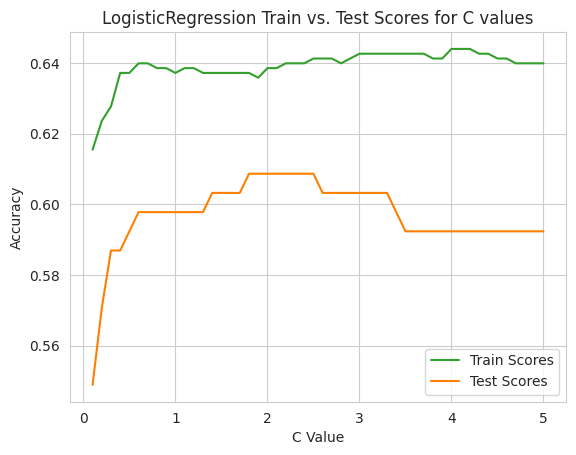

In [ ]:
plt.plot(c_values, train_scores, label="Train Scores", color=train_color)
plt.plot(c_values, test_scores, label="Test Scores", color=test_color)

plt.title("LogisticRegression Train vs. Test Scores for C values")
plt.xlabel("C Value")
plt.ylabel("Accuracy")

plt.xticks(np.arange(0, 6, 1))
plt.legend()
plt.savefig("log_reg_scores.jpg")

In [ ]:
print(f"Maximum LogisticRegression accuracy score on the test data: {max(test_scores)*100}%")

Maximum LogisticRegression accuracy score on the test data: 60.86956521739131%


In [ ]:
model_scores

{'LogisticRegression': 0.5978260869565217,
 'KNeighborsClassifier': 0.5706521739130435,
 'RandomForestClassifier': 0.5652173913043478}

By further experimenting with the best GridSearchCV hyperparameters found, I could improve the model (0.597 -> 0.608).

In [ ]:
#Optimal C value

max_test_score_index = np.argmax(test_scores)
c_values[max_test_score_index]

1.8000000000000003

2) Classifier Evaluation:
  - Confusion matrix
  - Classification report
  - ROC curve and AUC metrics

The model with the highest accuracy: LogisticRegression(max_iter=1000, C=1.8, solver="lbfgs", penalty="l2")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
np.random.seed(42)
clf = LogisticRegression(max_iter=1000, C=1.8, solver="lbfgs", penalty="l2")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6086956521739131

In [ ]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       3, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 3, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 1, 0, 0, 3, 3, 0, 1,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 3,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 3, 3, 0, 0, 1, 1, 1, 3, 0, 0, 1, 2, 1, 3, 0,
       0, 1, 0, 3, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 4, 0, 1, 1])

In [ ]:
np.array(y_test)

array([0, 0, 1, 3, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 3, 0, 0, 0, 0, 1, 0, 1,
       3, 2, 3, 1, 3, 0, 3, 0, 1, 1, 0, 3, 0, 2, 0, 1, 3, 1, 3, 0, 0, 0,
       0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0, 0, 3, 3, 1, 2,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 4, 1, 2,
       2, 4, 4, 3, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0,
       1, 4, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 3, 1, 1, 2, 1, 0, 2, 3, 1, 2, 2, 0, 1, 2, 1, 2, 2,
       0, 1, 0, 2, 1, 0, 1, 2, 3, 0, 1, 3, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 3, 3, 0, 3, 3, 0, 1])

  - Confusion Matrix

In [ ]:
y_test = np.array(y_test)

In [ ]:
# Create a confusion matrix using the confusion_matrix function

conf_matrix = confusion_matrix(y_test, y_preds)

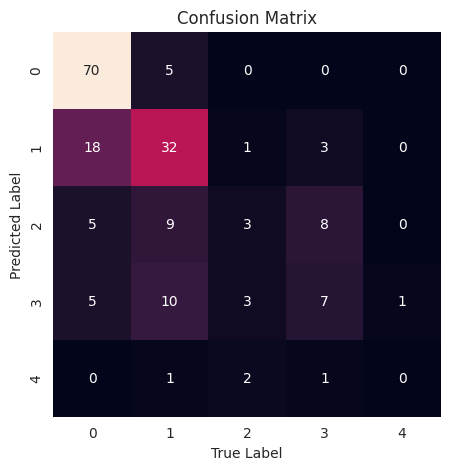

In [ ]:
# Create a more visual confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cbar=False).set_title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label");
plt.savefig("conf_matrix.jpg")

As the heart disease types vary, the model has a harder and harder time predicting the right value. This could be for a number of reasons such as the class imbalance (the male population is larger amongs patients in this dataset). When it comes to type 1 heart disease the model does okay at predicting the true label and even when failing, the model predicts a different heart disease type, instead of the patient being healthy. For the other 3 types, the model does really poorly.

 - Classification Report


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        75
           1       0.56      0.59      0.58        54
           2       0.33      0.12      0.18        25
           3       0.37      0.27      0.31        26
           4       0.00      0.00      0.00         4

    accuracy                           0.61       184
   macro avg       0.40      0.38      0.37       184
weighted avg       0.55      0.61      0.57       184



* Class 0 (no heart disease):

Precision of 0.71: Out of all instances predicted as having no heart disease, 71% are correctly classified.
Recall of 0.93: The model correctly identifies 93% of all actual instances with no heart disease.
F1-score of 0.81: There is a balanced trade-off between precision and recall for this class.
These metrics for class 0 indicate that the model performs relatively well in identifying instances with no heart disease.

* Classes 1-4 (various severity heart diseases):

Precision, recall, and F1-scores for these classes are generally lower compared to class 0.
For instance, class 1 has precision, recall, and F1-score values of 0.56, 0.59, and 0.58 respectively. This indicates moderate performance in identifying instances with type 1 heart disease.
However, classes 2, 3, and 4 have notably lower performance metrics. Particularly, class 4 has a precision, recall, and F1-score of 0.00, suggesting that the model fails to correctly classify any instances of type 4 heart disease.

Overall, the model performs relatively well in identifying instances with no heart disease (class 0), but its performance decreases as the severity of heart disease increases (classes 1-4). There may be a need for further model refinement or additional data to improve performance, especially for detecting severe heart diseases.



- ROC Curve and AUC Metrics

Since I have a multiclass-classification problem I will use the OvR (One-vs-Rest) strategy to plot the ROC curve.

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("tab20b")

In [ ]:
sns.color_palette()

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [ ]:
palette = sns.color_palette()

class_colors = [palette[2], palette[6], palette[10], palette[14], palette[18]]

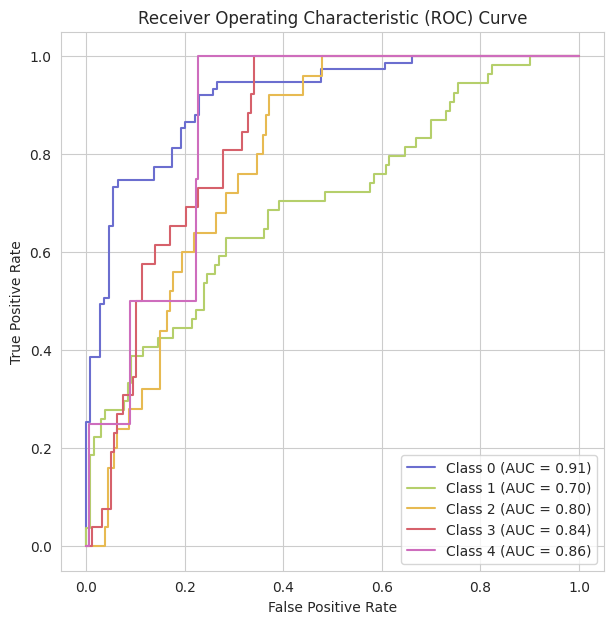

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

#Fit the classifier using OneVsRestClassifier
clf_ovr = OneVsRestClassifier(clf)
clf_ovr.fit(X_train, y_train)

#Binarize the labels
y_test_binarized = label_binarize(y_test, classes=clf_ovr.classes_)

#Get predicted probabilities for each class
y_probs = clf_ovr.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clf_ovr.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 7))

for i in range(len(clf_ovr.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {clf_ovr.classes_[i]} (AUC = {roc_auc[i]:.2f})', color=class_colors[i])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.savefig("roc_curve.jpg")

AUC values range from 0 to 1, where 0 represents a model that makes all predictions incorrectly, and 1 represents a model that makes all predictions perfectly.
An AUC of 0.7-0.91 suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

3) Feature Importance

Which features contributed most to the outcomes of the prediction of the model? How did they contribute?

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")

In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 15)

In [ ]:
np.random.seed(42)
clf = LogisticRegression(max_iter=1000, C=1.8, solver="lbfgs", penalty="l2")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6086956521739131

In [ ]:
# Get feature importances (coefficients) and intercept
coefficients = clf.coef_[0]
intercept = clf.intercept_

# Calculate feature importance scores (absolute values of coefficients)
feature_importances = np.abs(coefficients)

# Get the indices of features in descending order of importance
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for rank, index in enumerate(indices):
    feature_name = X_train.columns[index] if hasattr(X_train, 'columns') else f"Feature {index}"
    print(f"{rank + 1}. {feature_name} ({feature_importances[index]:.4f})")

Feature ranking:
1. oldpeak (3.5019)
2. dataset_Switzerland (2.1502)
3. dataset_Hungary (1.9535)
4. ca (1.7745)
5. cp_asymptomatic (1.0647)
6. thalch (0.9775)
7. cp_atypical angina (0.8459)
8. sex_Male (0.5006)
9. sex_Female (0.5000)
10. age (0.4848)
11. chol (0.4842)
12. thal_normal (0.4822)
13. trestbps (0.4005)
14. exang_True (0.3909)
15. exang_False (0.3903)
16. thal_fixed defect (0.3531)
17. slope_upsloping (0.3147)
18. slope_flat (0.3020)
19. cp_typical angina (0.2501)
20. restecg_st-t abnormality (0.2115)
21. restecg_normal (0.2018)
22. dataset_VA Long Beach (0.1743)
23. fbs_True (0.1503)
24. fbs_False (0.1497)
25. thal_reversable defect (0.1297)
26. cp_non-anginal (0.0320)
27. dataset_Cleveland (0.0218)
28. slope_downsloping (0.0133)
29. restecg_lv hypertrophy (0.0091)


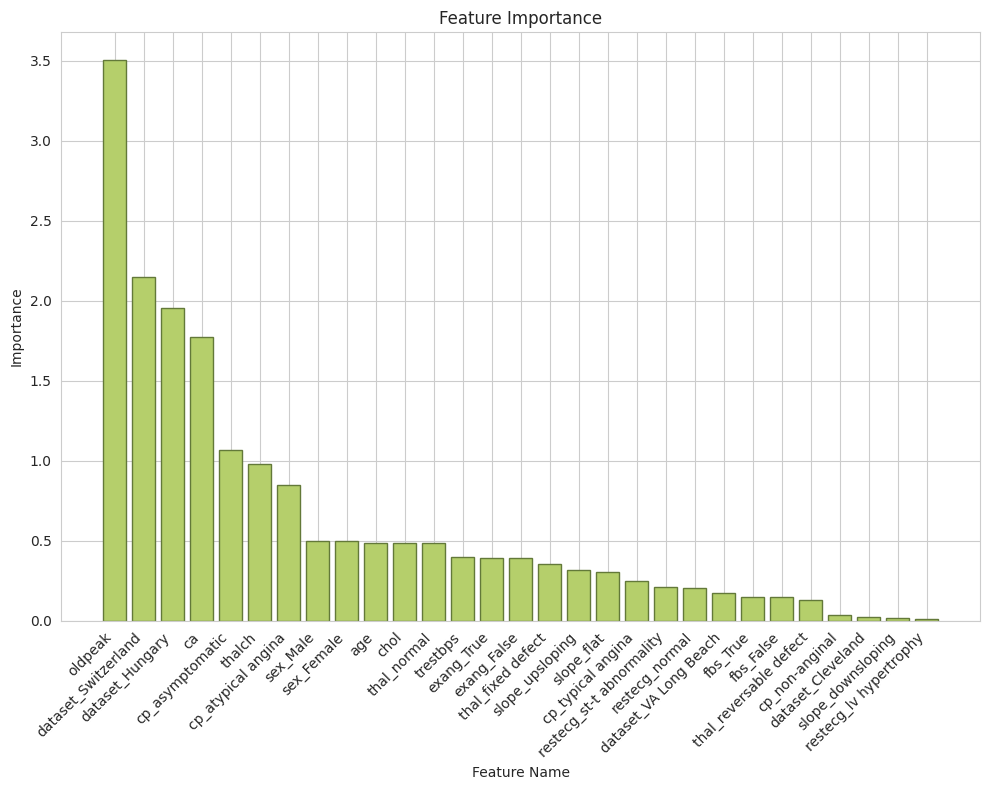

In [ ]:
# Plot the feature importances

plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center", color=palette[6], edgecolor=palette[4])
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=45, ha="right")
plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
#plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("feature_importance.jpg")

By looking at this plot we can exclude some of the features that have an importance close to 0 in order to improve the model in our future experiments.

###Saving the Model

In [ ]:
#The most accurate model

np.random.seed(42)
clf = LogisticRegression(max_iter=1000, C=1.8, solver="lbfgs", penalty="l2")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6086956521739131

In [ ]:
import joblib

In [ ]:
# Save the trained model using joblib
joblib.dump(clf, 'logistic_regression_classifier.joblib')

['logistic_regression_classifier.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('logistic_regression_classifier.joblib')

In [ ]:
loaded_model.score(X_test, y_test)

0.6086956521739131

##7. SWOT Analysis


###**Strenghts**
* Well-defined objective and evaluation metric.
* Throughout exploration of data.
* The imputation of missing values for both numerical and categorical features reflects the original dataset's values.
* Performed feature-scaling to better model accuracies.
* Experimented with various models and hyperparameter combinations.
* Evaluated best performing model using various methods and evaluators.

###**Weaknesses**
* Lack of data - the dataset has less than a 1000 unique records.
* Lack of balance between classes that affects the prediction power of the model.
* The accuracy score is small compared to ideal value.
* The model demonstrates strong performance in identifying instances without heart disease (class 0), with high precision, recall, and F1-score. However, its effectiveness diminishes as the severity of heart disease increases (classes 1-4), as indicated by lower precision, recall, and F1-scores for these classes. Further refinement or additional data may be necessary to enhance the model's ability to accurately detect severe heart diseases.

###**Opportunities**
* Experiment excluding some of the features that have small importance to better the accuracy.
* Experimenting with even more models, such as LinearSVC, SVC, CatBoost, XGBoost, etc.
* Looking into projects on the subject to uncover other methods that can be used to better the predictions.
* Gathering more data.
* Calculating evaluation metrics using cross-validation (precision, recall, f1 score).

###**Threats**
* Other projects could include better models with higher accuracies.
* There are other models and methods for constructing the classifier that are not included in this analysis.
* Not meeting the 95% accuracy objective.